# Natural Language

Examples:

- Speech transcription

- Neural machine translation

- chatbot

- Q&A

- Text summarization

- Image captioning

- Video captioning (for subscription)

In [1]:
import bs4 as bs
import urllib.request
import nltk
import spacy
import lxml

In [2]:
from spacy.lang.pt.examples import sentences 

# Part-of-speech

In [18]:
nlp = spacy.load("pt_core_news_sm")
nlp

In [19]:
document = nlp('Estou aprendendo processamento de linguagem natural, curso de São Paulo')

In [20]:
type(document)

spacy.tokens.doc.Doc

In [21]:
for token in document:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
de ADP
São PROPN
Paulo PROPN


# Lemmatization and stemming

In both stemming and lemmatization, we try to reduce a given word to its root word

**Lemmatization** is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities.

**Stemming** is a rule-based approach that converts words to their root word (stem) to remove inflection without worrying about the context of the word in the sentence

In [22]:
for token in document:
    print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso curso
de de
São São
Paulo Paulo


In [25]:
document2 = nlp("encontrei encontraram encontrarão encontrariam cursando curso cursei")
[token.lemma_ for token in document2]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'curso',
 'cursar']

In [26]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\ville\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


True

In [27]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [28]:
for token in document:
    print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso curso curs
de de de
São São são
Paulo Paulo paul


# Downloading data/text

In [3]:
data = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [4]:
data = data.read()
data

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-c

In [5]:
data_html = bs.BeautifulSoup(data,'lxml')
data_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-p

In [6]:
paragraph = data_html.find_all("p")

In [7]:
len(paragraph)

65

In [9]:
paragraph[1]

<p>Algumas das principais áreas relacionadas à IA incluem:
</p>

In [10]:
paragraph[1].text

'Algumas das principais áreas relacionadas à IA incluem:\n'

In [11]:
content = ''
for p in paragraph:
    content += p.text

In [12]:
content

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nAlgumas das principais áreas relacionadas à IA incluem:\nÉ difícil definir especificamente a Inteligência Artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

In [13]:
content = content.lower()
content

'a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] é também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nalgumas das principais áreas relacionadas à ia incluem:\né difícil definir especificamente a inteligência artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

# spaCy for text search

In [15]:
nlp = spacy.load("pt_core_news_sm")
nlp

In [16]:
string = 'turing'
token_search = nlp(string)

In [20]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
matcher.add('SEARCH',None, token_search)

In [21]:
doc = nlp(content)
matches = matcher(doc)
matches

[(8661325627334373315, 3463, 3464),
 (8661325627334373315, 3473, 3474),
 (8661325627334373315, 3629, 3630),
 (8661325627334373315, 3634, 3635),
 (8661325627334373315, 3640, 3641),
 (8661325627334373315, 3703, 3704),
 (8661325627334373315, 4356, 4357),
 (8661325627334373315, 5573, 5574),
 (8661325627334373315, 5708, 5709),
 (8661325627334373315, 5803, 5804),
 (8661325627334373315, 5920, 5921)]

In [24]:
doc[3463:3464] ,doc[3473:3474]

(turing, turing)

In [26]:
doc[3473-5:3474+10]

chamou depois de teste de turing (tt),[34] de 1950: em lugar de responder

In [29]:
matches[0][1],matches[0][2]

(3463, 3464)

In [32]:
from IPython.core.display import HTML

In [38]:
text = ""
number_words = 50

doc = nlp(content)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f'''<p><strong>Results found: </strong>{len(matches)}</p> '''))

for i in matches:
    start = i[1]- number_words
    if start < 0:
        start =0
    end   = i[2]+ number_words
    text += str(doc[start:end]).replace(string,f'<mark>{string} </mark>')
    text += "<br /><br />"
display(HTML(f'''... {text} ... '''))

# Named-Entity Recognition

**Named Entity Recognition** (NER) is a sub-task of information extraction in Natural Language Processing (NLP) that classifies named entities into predefined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, and more.

In [40]:
for entity in doc.ents:
    print(entity.text, entity.label_)

pensamento:[1 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
prolog MISC
gpt-3[21 MISC
google ORG
wikipédia MISC
john mccarthy PER
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
robótica.[8 ORG
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
programáveis.[35][36 O

In [41]:
from spacy import displacy


In [42]:
displacy.render(doc, style='ent', jupyter=True)

# Word cloud and stop word

In [43]:
from matplotlib.colors import ListedColormap

In [44]:
color_map = ListedColormap(['orange','green','red','magenta'])

In [45]:
from wordcloud import WordCloud

In [48]:
cloud = WordCloud(background_color='black',
                  max_words = 100,
                  colormap = color_map)

In [49]:
import matplotlib.pyplot as plt

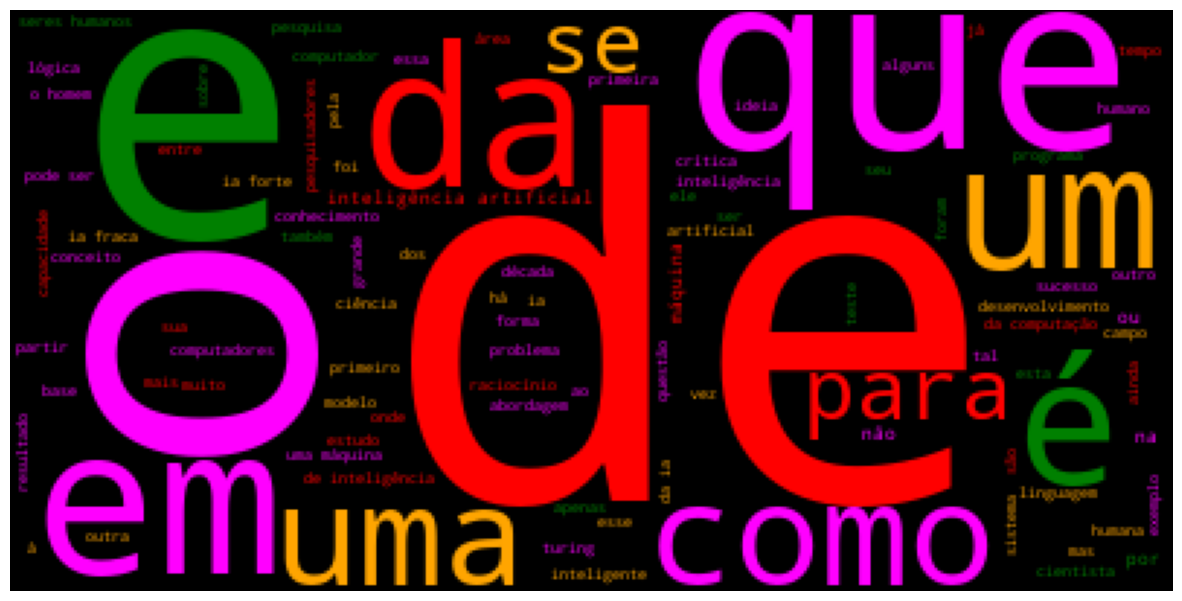

In [51]:
cloud = cloud.generate(content)
plt.figure(figsize = (15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [52]:
# remove stop words
from spacy.lang.pt.stop_words import STOP_WORDS

In [53]:
print(STOP_WORDS)

{'sua', 'tendes', 'mil', 'menos', 'sétimo', 'dez', 'contudo', 'vos', 'essa', 'naquele', 'onde', 'desse', 'faço', 'algo', 'local', 'ora', 'portanto', 'sobre', 'vezes', 'dezassete', 'és', 'tais', 'irá', 'maioria', 'quieta', 'tenho', 'vai', 'for', 'na', 'vossos', 'outras', 'foste', 'fazia', 'des', 'números', 'parte', 'fui', 'dá', 'faz', 'outros', 'nunca', 'ao', 'não', 'tal', 'esse', 'estiveram', 'também', 'novo', 'fazer', 'baixo', 'maior', 'cada', 'naquela', 'outra', 'ter', 'vinte', 'grupo', 'tua', 'dos', 'saber', 'dezoito', 'você', 'mal', 'como', 'ligado', 'o', 'vais', 'certamente', 'dentro', 'sob', 'sei', 'desta', 'este', 'todos', 'três', 'poder', 'desde', 'pode', 'meus', 'ponto', 'estará', 'conhecida', 'ambas', 'estás', 'tarde', 'obrigado', 'sétima', 'ser', 'terceira', 'sistema', 'vens', 'lhe', 'esteve', 'por', 'diz', 'nos', 'pontos', 'muito', 'ele', 'as', 'catorze', 'fazemos', 'cá', 'breve', 'sexto', 'tive', 'debaixo', 'duas', 'foi', 'apoio', 'nossas', 'meio', 'quinto', 'nesta', 'gran

In [56]:
nlp.vocab['de'].is_stop

True

In [57]:
doc = nlp(content)
token_list = []

for token in doc:
    token_list.append(token.text)
print(token_list)

['a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'um', 'campo', 'de', 'estudo', 'multidisciplinar', 'que', 'abrange', 'varias', 'áreas', 'do', 'conhecimento.[1][2', ']', 'é', 'também', 'um', 'conjunto', 'de', 'novas', 'tecnologias', 'que', 'permitem', 'aos', 'aparelhos', 'smart', 'executarem', 'várias', 'funções', 'avançadas', 'de', 'modo', 'quase', 'autônomo,[2][3', ']', 'representanto', 'um', 'marco', 'histórico', 'na', 'computação', 'moderna.[3', ']', 'embora', 'seu', 'desenvolvimento', 'tenha', 'avançado', 'mais', 'na', 'ciência', 'da', 'computação', ',', 'sua', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'de', 'diversas', 'disciplina', '.', '\n', 'algumas', 'das', 'principais', 'áreas', 'relacionadas', 'à', 'ia', 'incluem', ':', '\n', 'é', 'difícil', 'definir', 'especificamente', 'a', 'inteligência', 'artificial', ',', 'mas', 'ao', 'longo', 'do', 'tem

In [60]:
len(token_list)

6325

In [61]:
no_stop_words = []

for word in token_list:
    if nlp.vocab[word].is_stop == False:
        no_stop_words.append(word)

print(no_stop_words)

['inteligência', 'artificial', '(', 'sigla', ':', 'ia', ';', 'inglês', ':', 'artificial', 'intelligence', ',', 'sigla', ':', 'ai', ')', 'campo', 'estudo', 'multidisciplinar', 'abrange', 'varias', 'áreas', 'conhecimento.[1][2', ']', 'conjunto', 'tecnologias', 'permitem', 'aparelhos', 'smart', 'executarem', 'várias', 'funções', 'avançadas', 'modo', 'quase', 'autônomo,[2][3', ']', 'representanto', 'marco', 'histórico', 'computação', 'moderna.[3', ']', 'desenvolvimento', 'tenha', 'avançado', 'ciência', 'computação', ',', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'diversas', 'disciplina', '.', '\n', 'principais', 'áreas', 'relacionadas', 'ia', 'incluem', ':', '\n', 'difícil', 'definir', 'especificamente', 'inteligência', 'artificial', ',', 'longo', 'seguiu', 'linhas', 'pensamento:[1', ']', '\n', 'conceito', 'amplo', 'recebe', 'tantas', 'definições', 'significados', 'diferentes', 'palavra', 'inteligência.[4', ']', 'considerar', 'características', 'básicas', 'desses', 'sist

In [59]:
len(no_stop_words)

3660

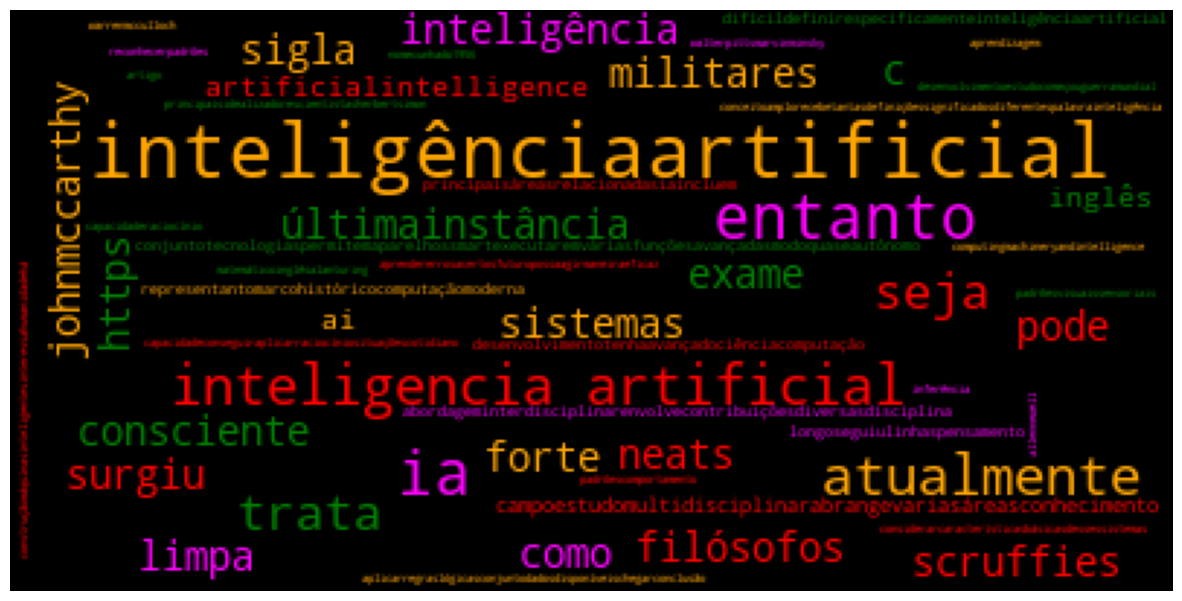

In [62]:
cloud = cloud.generate(''.join(no_stop_words))
plt.figure(figsize = (15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()